In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
pv.set_jupyter_backend('client')
import glob
import natsort

In [3]:
data_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/NP_0000_fine/'
# data_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/pipe_RCR_3d/'
pref = '4-procs/result'
filepath = data_path + pref + '_575.vtu'
mesh = pv.read(filepath)

half_pipe = mesh.clip(normal='y',origin=mesh.center,invert=False)

plotter = pv.Plotter(notebook=True)  # Use notebook=False outside Jupyter
# plotter.add_mesh(mesh, style="wireframe")
plotter.add_mesh(half_pipe, scalars="Velocity", 
    cmap="viridis",
    # show_edges=True,
    # edge_opacity=0.3
    )

# plotter.add_scalar_bar(title="Pressure")
plotter.camera_position = 'xz'
plotter.add_axes(interactive=True)

plotter.show()


Widget(value='<iframe src="http://localhost:39127/index.html?ui=P_0x787025bb7200_0&reconnect=auto" class="pyvi…

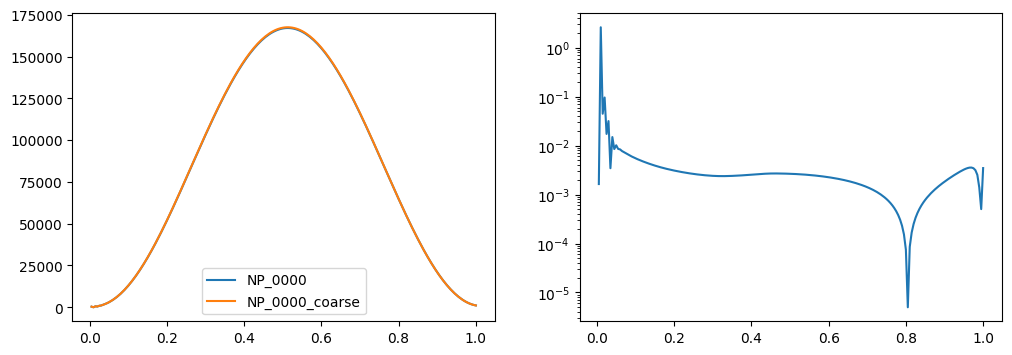

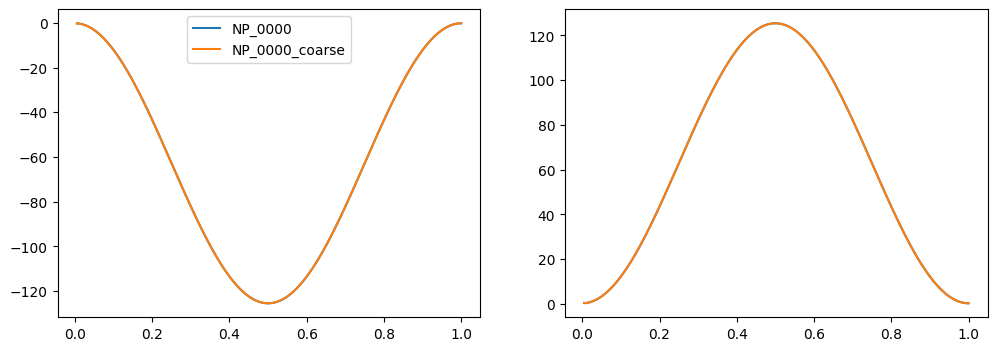

In [ ]:
# Compare cases
cases = ['NP_0000_fine','NP_0000','NP_0000_coarse']

# Pressure on wall
fig,ax=plt.subplots(1,2,figsize=(12,4))
for case in cases:
    data_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/' + case + '/'
    data = np.loadtxt(data_path + '4-procs/B_NS_Pressure_average.txt',skiprows=10)
    ax[0].plot(data[:,1],data[:,4],label=case)
ax[0].legend()
data1 = np.loadtxt('/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/' + cases[0] + '/4-procs/B_NS_Pressure_average.txt',skiprows=10)
data2 = np.loadtxt('/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/' + cases[1] + '/4-procs/B_NS_Pressure_average.txt',skiprows=10)
data3 = np.loadtxt('/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/' + cases[2] + '/4-procs/B_NS_Pressure_average.txt',skiprows=10)
ax[1].semilogy(data1[:,1],np.abs((data1[:,4]-data2[:,4])/data1[:,4]))
ax[1].semilogy(data1[:,1],np.abs((data1[:,4]-data3[:,4])/data1[:,4]))
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Pressure')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Error')

# Velocity fluxes
fig,ax=plt.subplots(1,2,figsize=(12,4))
for case in cases:
    data_path = '/home/dana/Documents/SimVascular/svMultiPhysics/NoisyPipe/' + case + '/'
    data = np.loadtxt(data_path + '4-procs/B_NS_Velocity_flux.txt',skiprows=10)
    ax[0].plot(data[:,1],data[:,2],label=case)
    ax[1].plot(data[:,1],data[:,3],label=case)
ax[0].legend()
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Velocity Flux at Inlet')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Velocity Flux at Outlet')